In [18]:
library(lmtest)
library(car)
library(carData)
library(hexView)
library(strucchange)
library(fBasics)

Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"
Warning message:
"package 'strucchange' was built under R version 4.2.2"
Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.2.2"
Warning message:
"package 'fBasics' was built under R version 4.2.2"

Attaching package: 'fBasics'


The following object is masked from 'package:car':

    densityPlot




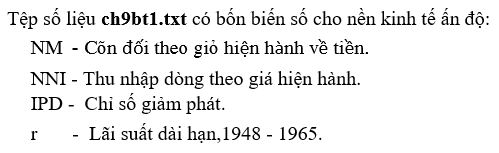

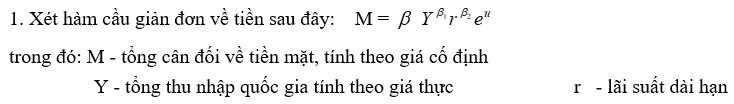

In [14]:
b1<-read.table('CH9BT1.TXT',header=TRUE)
b1$M=b1$NM/b1$IPD
b1$Y=b1$NNI/b1$IPD

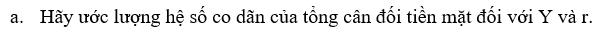

In [15]:
reg<-lm(data=b1,log(M)~log(Y)+log(r))
summary(reg)


Call:
lm(formula = log(M) ~ log(Y) + log(r), data = b1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15425 -0.04153  0.02093  0.03851  0.09818 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.6418     0.5328   6.836 8.12e-06 ***
log(Y)        1.4957     0.3325   4.498 0.000501 ***
log(r)       -0.5023     0.4173  -1.204 0.248672    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07146 on 14 degrees of freedom
Multiple R-squared:  0.8942,	Adjusted R-squared:  0.8791 
F-statistic: 59.19 on 2 and 14 DF,  p-value: 1.48e-07


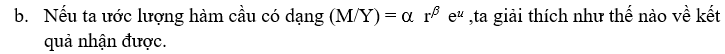

In [17]:
reg<-lm(data=b1,log(M/Y)~log(r))
summary(reg)


Call:
lm(formula = log(M/Y) ~ log(r), data = b1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16675 -0.01648  0.01538  0.04216  0.09824 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.89176    0.18213  15.878 8.67e-11 ***
log(r)       0.08911    0.13461   0.662    0.518    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07431 on 15 degrees of freedom
Multiple R-squared:  0.02838,	Adjusted R-squared:  -0.03639 
F-statistic: 0.4382 on 1 and 15 DF,  p-value: 0.518


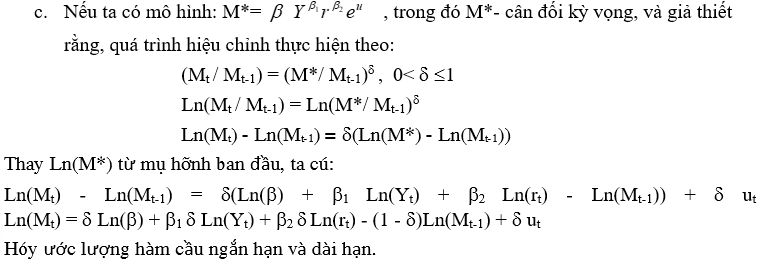

In [16]:
reg<-lm(data=b1,log(M)~log(Y)+log(r)+log(lag(M,1)))
summary(reg)

Warning message in summary.lm(reg):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = log(M) ~ log(Y) + log(r) + log(lag(M, 1)), data = b1)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.679e-17 -6.634e-18 -8.700e-20  3.727e-18  3.708e-17 

Coefficients:
                 Estimate Std. Error    t value Pr(>|t|)    
(Intercept)     9.352e-16  2.227e-16  4.200e+00  0.00104 ** 
log(Y)          3.818e-16  1.043e-16  3.660e+00  0.00288 ** 
log(r)         -8.104e-17  8.796e-17 -9.210e-01  0.37367    
log(lag(M, 1))  1.000e+00  5.363e-17  1.865e+16  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.434e-17 on 13 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.096e+33 on 3 and 13 DF,  p-value: < 2.2e-16


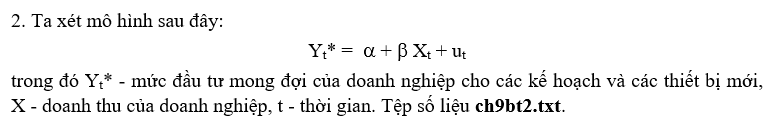

$$
Y_t=\beta_1\delta+\beta_2\delta X_{t}+(1-\delta)Y_{t-1}+\delta u_t
$$

In [10]:
b2<-read.table('CH9BT2.TXT',header=TRUE)

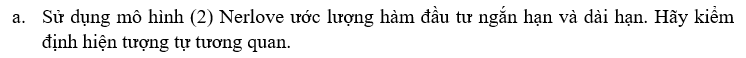

In [11]:
reg<-lm(data=b2,Y~X+lag(Y,1))
summary(reg)

Warning message in summary.lm(reg):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = Y ~ X + lag(Y, 1), data = b2)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.579e-15 -3.017e-16  2.975e-16  5.129e-16  1.812e-15 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  4.314e-15  1.036e-15  4.163e+00 0.000528 ***
X           -1.833e-16  3.238e-17 -5.662e+00 1.85e-05 ***
lag(Y, 1)    1.000e+00  3.778e-17  2.647e+16  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.271e-15 on 19 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.184e+34 on 2 and 19 DF,  p-value: < 2.2e-16


In [21]:
durbinWatsonTest(reg)

Warning message in summary.lm(model):
"essentially perfect fit: summary may be unreliable"


 lag Autocorrelation D-W Statistic p-value
   1     -0.07349553      2.037256   0.088
 Alternative hypothesis: rho != 0

Có tự tương quan

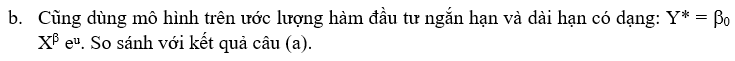

b)
$$
\begin{aligned}
&\log(Y_t)-\log(Y_{t-1})=\delta (\log(Y^*_{t-1})-\log(Y_{t-1}))\\

&\log(Y_t)-\log(Y_{t-1})=\delta (\log(\alpha)+\beta\log(X_{t-1})+u\log(e)-\log(Y_{t-1}))\\

&\log(Y_t)=\delta \log(\alpha)+\delta\beta\log(X_{t-1})+\delta u\log(e)+(1-\delta)\log(Y_{t-1})
\end{aligned}
$$

In [12]:
reg<-lm(data=b2,log(Y)~log(lag(X,1))+log(lag(Y,1)))
summary(reg)

Warning message in summary.lm(reg):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = log(Y) ~ log(lag(X, 1)) + log(lag(Y, 1)), data = b2)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.351e-17 -3.041e-18 -8.890e-19  4.778e-18  1.673e-17 

Coefficients:
                 Estimate Std. Error    t value Pr(>|t|)    
(Intercept)     4.972e-16  5.464e-17  9.098e+00 2.36e-08 ***
log(lag(X, 1)) -5.612e-16  4.462e-17 -1.258e+01 1.16e-10 ***
log(lag(Y, 1))  1.000e+00  3.737e-17  2.676e+16  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.211e-17 on 19 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.74e+34 on 2 and 19 DF,  p-value: < 2.2e-16


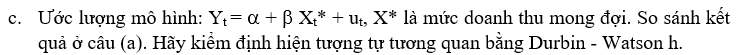

$$
Y_t=\lambda\beta_1+\beta_2\lambda X_{t-1}+(1-\lambda)Y_{t-1}+v_t
$$

In [22]:
reg<-lm(data=b2,Y~lag(X,1)+lag(Y,1))
summary(reg)

Warning message in summary.lm(reg):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = Y ~ lag(X, 1) + lag(Y, 1), data = b2)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.579e-15 -3.017e-16  2.975e-16  5.129e-16  1.812e-15 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  4.314e-15  1.036e-15  4.163e+00 0.000528 ***
lag(X, 1)   -1.833e-16  3.238e-17 -5.662e+00 1.85e-05 ***
lag(Y, 1)    1.000e+00  3.778e-17  2.647e+16  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.271e-15 on 19 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.184e+34 on 2 and 19 DF,  p-value: < 2.2e-16


In [23]:
durbinWatsonTest(reg)

Warning message in summary.lm(model):
"essentially perfect fit: summary may be unreliable"


 lag Autocorrelation D-W Statistic p-value
   1     -0.07349553      2.037256   0.078
 Alternative hypothesis: rho != 0

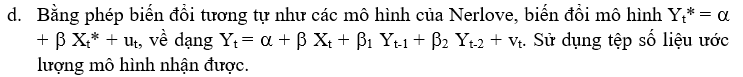

In [24]:
reg<-lm(data=b2,Y~X+lag(Y,1)+lag(Y,2))
summary(reg)

Warning message in summary.lm(reg):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = Y ~ X + lag(Y, 1) + lag(Y, 2), data = b2)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.579e-15 -3.017e-16  2.975e-16  5.129e-16  1.812e-15 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  4.314e-15  1.036e-15  4.163e+00 0.000528 ***
X           -1.833e-16  3.238e-17 -5.662e+00 1.85e-05 ***
lag(Y, 1)    1.000e+00  3.778e-17  2.647e+16  < 2e-16 ***
lag(Y, 2)           NA         NA         NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.271e-15 on 19 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.184e+34 on 2 and 19 DF,  p-value: < 2.2e-16


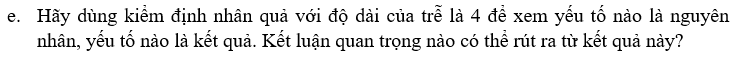

In [33]:
print(grangertest(X ~ Y, order = 3, data = b2))

Granger causality test

Model 1: X ~ Lags(X, 1:3) + Lags(Y, 1:3)
Model 2: X ~ Lags(X, 1:3)
  Res.Df Df      F  Pr(>F)  
1     12                    
2     15 -3 2.9881 0.07345 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [34]:
print(grangertest(Y ~ X, order = 3, data = b2))

Granger causality test

Model 1: Y ~ Lags(Y, 1:3) + Lags(X, 1:3)
Model 2: Y ~ Lags(Y, 1:3)
  Res.Df Df      F  Pr(>F)  
1     12                    
2     15 -3 3.1592 0.06427 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


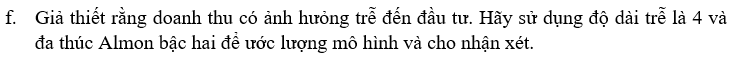

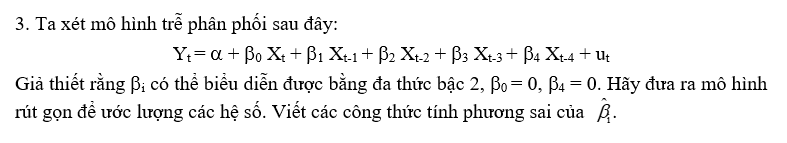

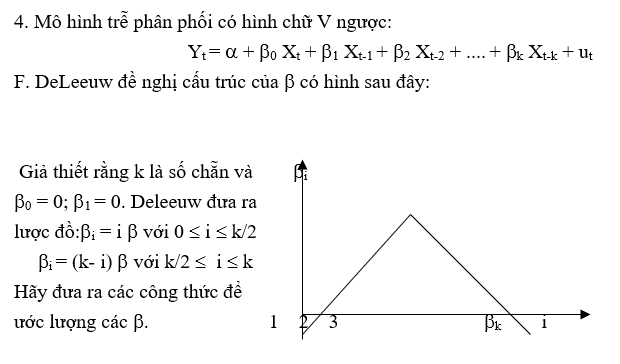

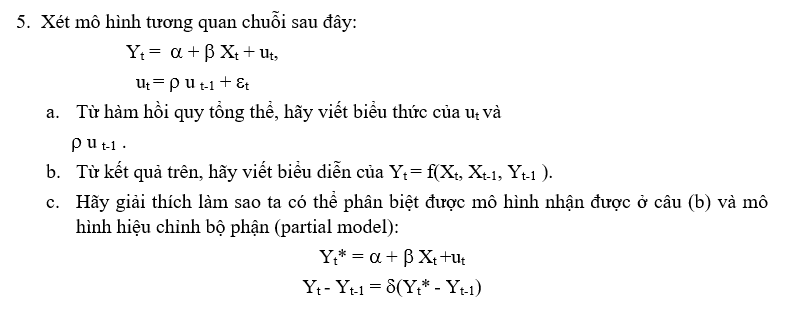

b)
$$
Y_t=\rho Y_{t-1}+(1-\rho)\alpha+\beta(X_t-\rho X_{t-1})+\epsilon_t
$$

c) 

Mô hình hiệu chỉnh bộ phận không có $X_{t-1}$

$$
Y_t=\beta_1\delta+\beta_2\delta X_{t}+(1-\delta)Y_{t-1}+\delta u_t
$$

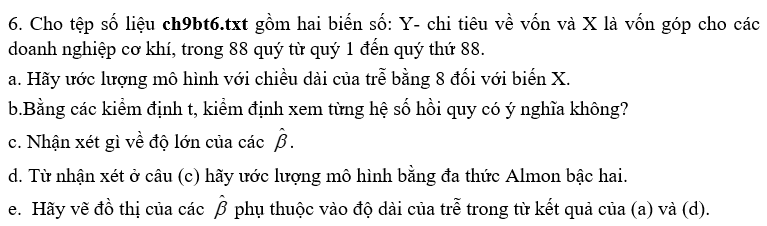

In [1]:
b6<-read.table('CH9BT6.TXT',header=TRUE)

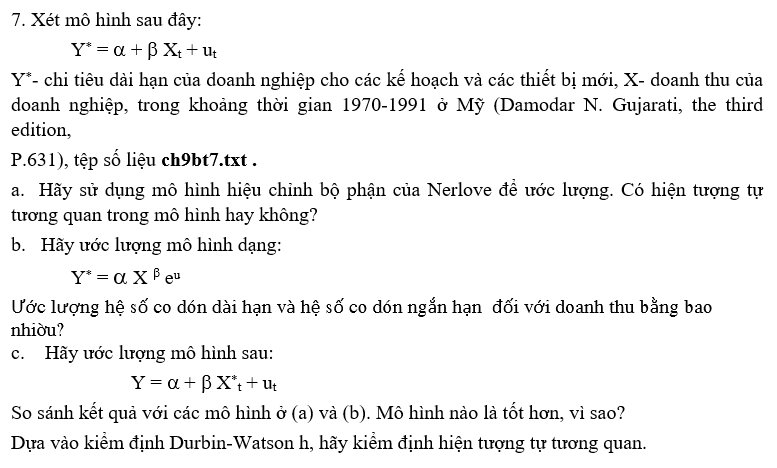

In [5]:
b7<-read.table('CH9BT7.TXT',header=TRUE)

a)
$$
Y_t=\lambda\beta_1+\beta_2\lambda X_{t-1}+(1-\lambda)Y_{t-1}+v_t
$$

In [7]:
reg<-lm(data=b7,Y~lag(X,1)+lag(Y,1))
print(summary(reg))

Warning message in summary.lm(reg):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = Y ~ lag(X, 1) + lag(Y, 1), data = b7)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.763e-15 -9.676e-16 -2.315e-16  2.480e-17  1.221e-14 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -1.064e-14  2.477e-15 -4.294e+00 0.000392 ***
lag(X, 1)    3.972e-16  7.443e-17  5.336e+00 3.78e-05 ***
lag(Y, 1)    1.000e+00  8.723e-17  1.146e+16  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.103e-15 on 19 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 3.099e+33 on 2 and 19 DF,  p-value: < 2.2e-16



b)
$$
\begin{aligned}
&\log(Y_t)-\log(Y_{t-1})=\delta (\log(Y^*_{t-1})-\log(Y_{t-1}))\\

&\log(Y_t)-\log(Y_{t-1})=\delta (\log(\alpha)+\beta\log(X_{t-1})+u\log(e)-\log(Y_{t-1}))\\

&\log(Y_t)=\delta \log(\alpha)+\delta\beta\log(X_{t-1})+\delta u\log(e)+(1-\delta)\log(Y_{t-1})
\end{aligned}
$$

In [9]:
reg<-lm(data=b7,log(Y)~log(lag(X,1))+log(lag(Y,1)))
print(summary(reg))

Warning message in summary.lm(reg):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = log(Y) ~ log(lag(X, 1)) + log(lag(Y, 1)), data = b7)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.221e-17 -2.305e-18  1.424e-18  3.618e-18  1.834e-17 

Coefficients:
                Estimate Std. Error   t value Pr(>|t|)    
(Intercept)    0.000e+00  3.341e-17 0.000e+00        1    
log(lag(X, 1)) 0.000e+00  2.498e-17 0.000e+00        1    
log(lag(Y, 1)) 1.000e+00  2.071e-17 4.829e+16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.609e-18 on 19 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 4.991e+34 on 2 and 19 DF,  p-value: < 2.2e-16



c)
$$
Y_t=\beta_1\delta+\beta_2\delta X_{t}+(1-\delta)Y_{t-1}+\delta u_t
$$

In [8]:
reg<-lm(data=b7,Y~X+lag(Y,1))
print(summary(reg))

Warning message in summary.lm(reg):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = Y ~ X + lag(Y, 1), data = b7)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.763e-15 -9.676e-16 -2.315e-16  2.480e-17  1.221e-14 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -1.064e-14  2.477e-15 -4.294e+00 0.000392 ***
X            3.972e-16  7.443e-17  5.336e+00 3.78e-05 ***
lag(Y, 1)    1.000e+00  8.723e-17  1.146e+16  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.103e-15 on 19 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 3.099e+33 on 2 and 19 DF,  p-value: < 2.2e-16



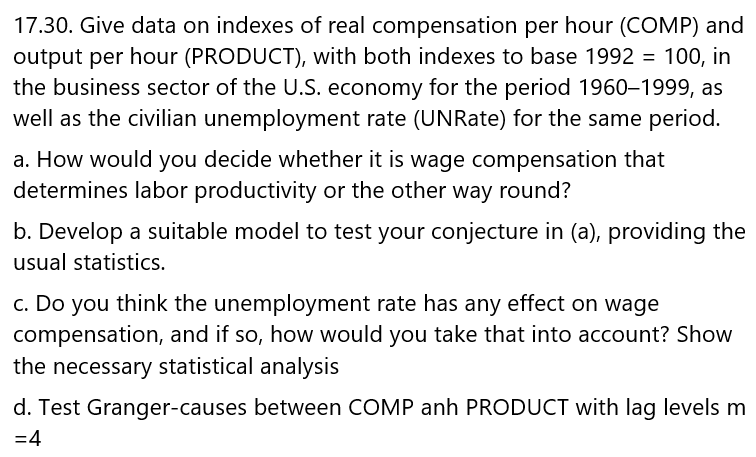